# 1 - Apresentação

In [1]:
import pandas as pd
import numpy as np

In [2]:
db_ocorrencia = pd.read_csv('base_dados/bases_nao_trabalhadas/ocorrencia_2010_2020.csv',sep =';')
db_ocorrencia_tipo = pd.read_csv('base_dados/bases_nao_trabalhadas/ocorrencia_tipo_2010_2020.csv',sep =';')
db_aeronave = pd.read_csv('base_dados/bases_nao_trabalhadas/aeronave_2010_2020.csv',sep =';')
db_fator_contribuinte = pd.read_csv('base_dados/bases_nao_trabalhadas/fator_contribuinte_2010_2020.csv',sep =';')

# 1 Base de dados

## 1.0 OCORRÊNCIA.csv - Informações sobre as ocorrências.

#### * Impressão dos Dados 

In [3]:
db_ocorrencia

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,...,03/01/2010,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,...,03/01/2010,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
2,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,...,03/01/2010,03:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
3,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,...,04/01/2010,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
4,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,...,05/01/2010,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5747,79804,79804,79804,79804,79804,INCIDENTE,-23.0069444444,-47.1344444444,CAMPINAS,SP,...,29/12/2020,19:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
5748,79757,79757,79757,79757,79757,INCIDENTE GRAVE,-10.804722,-49.756389,LAGOA DA CONFUSÃO,TO,...,30/12/2020,18:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
5749,79802,79802,79802,79802,79802,INCIDENTE,-22.81,-43.25055555555,RIO DE JANEIRO,RJ,...,30/12/2020,00:54:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
5750,79756,79756,79756,79756,79756,INCIDENTE GRAVE,-22.507222,-54.364167,VICENTINA,MS,...,31/12/2020,09:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


### 1.0.1 Descrição dos dados da base de ocorrencia

In [4]:
db_ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5752 entries, 0 to 5751
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               5752 non-null   int64 
 1   codigo_ocorrencia1              5752 non-null   int64 
 2   codigo_ocorrencia2              5752 non-null   int64 
 3   codigo_ocorrencia3              5752 non-null   int64 
 4   codigo_ocorrencia4              5752 non-null   int64 
 5   ocorrencia_classificacao        5752 non-null   object
 6   ocorrencia_latitude             4187 non-null   object
 7   ocorrencia_longitude            4187 non-null   object
 8   ocorrencia_cidade               5752 non-null   object
 9   ocorrencia_uf                   5752 non-null   object
 10  ocorrencia_pais                 5752 non-null   object
 11  ocorrencia_aerodromo            5752 non-null   object
 12  ocorrencia_dia                  5752 non-null   

As impormosções apresentadas acima (returno da função info), trazem as colunas 'ocorrencia_classificacao', 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo', 'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada', 'investigacao_status', 'divulgacao_relatorio_numero', 'divulgacao_relatorio_publicado','divulgacao_dia_publicacao', 'ocorrencia_saida_pista' como variaveis categoricas ('ocorrencia_latitude' e 'ocorrencia_longitude' são variaveis numerias, porem devido à aproximadamente 27% nos valoes nesses colunas estarem como ausente, a função interpretou como categoricas).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As colunas 'total_recomendacoes'e 'total_aeronaves_envolvidas' são variaves numericas. É possível afirmar que as colunas 'codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3' e 'codigo_ocorrencia4' também são variaveis numericas, porém como se tratam de identificadores, fica como uma categoria a parte.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A seguir será apresenta algumas analise feita em colunas selecionadas baseadas nas informações apresentadas acima, na seção[colocar um numero aqui] serão justivicada as escolhas aqui realizadas.

### 1.0.2 Verificação de valores Ausentes (null/missing)

O intuido dessa seção é verificar quais valores são null conforma apresentado na seção 1.0.1. Dados que foram retornado pela função info(), as colunas 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_hora', 'investigacao_aeronave_liberada', 'investigacao_status', 'divulgacao_relatorio_numero' e 'divulgacao_dia_publicacao' contém valores ausentes (null). O grafico abaixo ilustra a porcentagem de valoes null de cada coluna, exeto as colunas de codigo.

In [5]:
aux_porc_null_colunas = {}
for i in db_ocorrencia.iloc[:,5:]:
    aux_porc_null_colunas[i] = (db_ocorrencia[i].isnull().sum() * 100)/db_ocorrencia.shape[0]


aux_porc_null_colunas = pd.Series(dict(sorted(aux_porc_null_colunas.items(), key=lambda x: x[1], reverse=False)))
aux_porc_null_colunas

ocorrencia_classificacao           0.000000
ocorrencia_cidade                  0.000000
ocorrencia_uf                      0.000000
ocorrencia_pais                    0.000000
ocorrencia_aerodromo               0.000000
ocorrencia_dia                     0.000000
divulgacao_relatorio_publicado     0.000000
total_recomendacoes                0.000000
total_aeronaves_envolvidas         0.000000
ocorrencia_saida_pista             0.000000
ocorrencia_hora                    0.017385
investigacao_status                5.910987
investigacao_aeronave_liberada     5.928373
divulgacao_relatorio_numero       15.038248
ocorrencia_latitude               27.207928
ocorrencia_longitude              27.207928
divulgacao_dia_publicacao         74.026426
dtype: float64

#### Representação gráfica dos valores ausentes

<AxesSubplot:title={'center':'Porcentagem de valores ausentes na base de Ocorrencias'}>

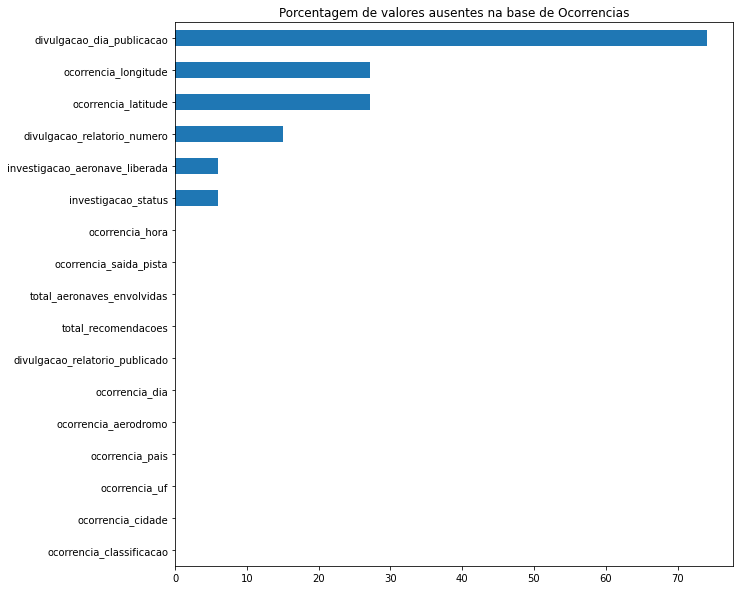

In [6]:
aux_porc_null_colunas.plot.barh(xlabel='', ylabel='%', title='Porcentagem de valores ausentes na base de Ocorrencias',figsize=(10,10))

### 1.0.4 Verificando se os dados Latitude e Longitude são corespondem
O objetivo desse verificação é ver se nas mesmas linhas de Longitude e Logitude os valores está ausentes, ou presentes.

In [7]:
aux_latitude_longitude_null = db_ocorrencia['ocorrencia_latitude'].isnull() == db_ocorrencia['ocorrencia_longitude'].isnull()
print(f'O numero de diferênça entre as Colunas é de {len(aux_latitude_longitude_null[aux_latitude_longitude_null==False])}')

O numero de diferênça entre as Colunas é de 0


### 1.0.5 Verificar se as calunas 'codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4' têm os mesmos códigos de referência.

Abaixo está a verificação se as cinco colunas de codigos contém o mesmo número de identificação (id's) e se não há ocorrencias registradas com id's iguais.

#### a) Teste de comparação de id's nas colunas 'codigo_ocorrencia' à 'codigo_ocorrencia4'

In [8]:
# a)
temp_cod_ocorrencia_mesmo_valor = db_ocorrencia.iloc[:,0:5].to_numpy()
id_cod_diferentes = []
for e,i in enumerate(temp_cod_ocorrencia_mesmo_valor):
    if not(i[0] == i[1] == i[2] ==  i[3] == i[4]):
        id_cod_diferentes.append(e)

if len(id_cod_diferentes) > 0:
    print('Segue abaixo as colnas linhas com códico de ocorrencias diferentes entre as colunas "codigo_ocorrencia" à "codigo_ocorrencia4"')
    print(id_cod_diferentes)
else:
    print('Os códigos de cada linha entre as colunas de "codigo_ocorrencia" à "codigo_ocorrencia4" são iguais')

Os códigos de cada linha entre as colunas de "codigo_ocorrencia" à "codigo_ocorrencia4" são iguais


#### b) Teste se existem id's repetido na coluna 'codigo_ocorrencia'

In [9]:
# b)
db_ocorrencia.iloc[:,0].is_unique

True

Conforme apresentado acima {a)}, não há divergencias entre as colunas codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3' e 'codigo_ocorrencia4', o que indica a possivilidade de simplificação destas cinco colunas em uma ('codigo_ocorrencia') sem nenhum prejuizo para a identificação com as demais base de dados.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Dado o resultado obitido em b) é possivel inferir que não existe nenhuma ocorrencia com o id's repedido, pois na seção a) foi verificado que os valores entre as colunas "codigo_ocorrencia" e "codigo_ocorrencia4" são equivalentes e b) valida que são id's unicos. 

### 1.0.6 Varificação da coluna ocorrencia_aerodromo

In [10]:
#inicialização do dicionario para a contagem dos aerodromo
aux_count_cat_ocorrencia_aerodromo = dict([[x, 0] for x in db_ocorrencia['ocorrencia_aerodromo'].unique()])

#Laço para contar quantas vezes aparece um determinado valor
for i in db_ocorrencia['ocorrencia_aerodromo']:
    aux_count_cat_ocorrencia_aerodromo[i] = aux_count_cat_ocorrencia_aerodromo[i]+1


valores_indeterminados = ['****', '*****', '###!', '####']
aux_count_cat_ocorrencia_aerodromo['indeterminado'] = 0

#subistituição e remoção das variaveis com valores_indeterminados
for j in valores_indeterminados:
    aux_count_cat_ocorrencia_aerodromo['indeterminado'] += aux_count_cat_ocorrencia_aerodromo[j]
    aux_count_cat_ocorrencia_aerodromo.pop(j,None)

#converção para dataseries ordenando o dict de acordo com os valores
aux_count_cat_ocorrencia_aerodromo = pd.DataFrame(list(sorted(aux_count_cat_ocorrencia_aerodromo.items(), key=lambda x: x[1], reverse=False)), columns=['ocorrencia_aerodromo', 'quant'])

aux_count_cat_ocorrencia_aerodromo

,ocorrencia_aerodromo,quant
0,SNVR,1
1,SSUV,1
2,SWOZ,1
3,SNUZ,1
4,SWXV,1
...,...,...
507,SBLO,100
508,SBBH,106
509,SBMT,126
510,SBGR,140


## 1.1 OCORRÊNCIA_TIPO.csv - Informações sobre o tipo de ocorrência.

### * Impressão dos Dados

In [11]:
db_ocorrencia_tipo

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,39115,PANE SECA,COMBUSTÍVEL | PANE SECA,FUEL
1,39155,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
2,39156,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO,F-NI
3,39158,SUPERAQUECIMENTO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQU...,SCF-PP
4,39176,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
...,...,...,...,...
5879,79802,VAZAMENTO DE OUTROS FLUIDOS,OUTROS | VAZAMENTO DE OUTROS FLUIDOS,OTHR
5880,79804,DESCOMPRESSÃO NÃO INTENCIONAL / EXPLOSIVA,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
5881,79824,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,LOC-I
5882,79844,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP


Por esse plot inicial, é possivel perceber que as bases OCORRÊNCIA_TIPO e OCORRÊNCIA têm quantidade de linha diferentes (+132 para ser mais expecífico), pois, "uma ocorrência pode conter mais de um fator contribuinte" conforme o documento [Aviação Particular - Sumário Estatístico 2010-2019](https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira/resource/ec437ea1-fc17-45f9-8314-956e5ad411aa)

### 1.1.1 Descrição dos dados da base de OCORRÊNCIA_TIPO

In [12]:
db_ocorrencia_tipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo_ocorrencia1         5884 non-null   int64 
 1   ocorrencia_tipo            5884 non-null   object
 2   ocorrencia_tipo_categoria  5884 non-null   object
 3   taxonomia_tipo_icao        5884 non-null   object
dtypes: int64(1), object(3)
memory usage: 184.0+ KB


Dado o que foi retornado na função acima, as colunas 'ocorrencia_tipo', 'ocorrencia_tipo_categoria' e 'taxonomia_tipo_icao' são variaveis categoricas. a coluna 'codigo_ocorrencia1' se tratam de identificador.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Também é possivel notar que não existe valor ausente desse conjunto de dados.

### 1.1.2 Verificação dos valoes perentes na coluna 'ocorrencia_tipo'

In [13]:
#inicialização do dicionario para a contagem dos ocorrencia_tipo
aux_count_cat_ocorrencia_tipo = dict([[x, 0] for x in db_ocorrencia_tipo['ocorrencia_tipo'].unique()])

#Laço para contar quantas vezes aparece um determinado valor
for i in db_ocorrencia_tipo['ocorrencia_tipo']:
    aux_count_cat_ocorrencia_tipo[i] = aux_count_cat_ocorrencia_tipo[i]+1


#converção para dataseries ordenando o dict de acordo com os valores
aux_count_cat_ocorrencia_tipo = pd.DataFrame(list(sorted(aux_count_cat_ocorrencia_tipo.items(), key=lambda x: x[1], reverse=False)), columns=['ocorrencia_tipo', 'quant'])

aux_count_cat_ocorrencia_tipo.index=[x for x in range(aux_count_cat_ocorrencia_tipo.shape[0])]
aux_count_cat_ocorrencia_tipo

,ocorrencia_tipo,quant
0,HIPÓXIA,1
1,RELACIONADO COM SECURITY,1
2,CAUSADO POR RICOCHETE,1
3,IMC NÃO INTENCIONAL,1
4,PERDA DE SEPARAÇÃO / COLISÃO EM VOO,1
...,...,...
74,PERDA DE CONTROLE EM VOO,363
75,PERDA DE CONTROLE NO SOLO,459
76,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,612
77,ESTOURO DE PNEU,614


In [14]:
temp_index_quant_colecao_menor_50 = aux_count_cat_ocorrencia_tipo[aux_count_cat_ocorrencia_tipo['quant']<50]
aux_count_cat_ocorrencia_tipo = aux_count_cat_ocorrencia_tipo.append({'ocorrencia_tipo': 'COLECAO<50', 'quant': temp_index_quant_colecao_menor_50['quant'].sum()},  ignore_index=True)
aux_count_cat_ocorrencia_tipo[aux_count_cat_ocorrencia_tipo['quant']>=50]

,ocorrencia_tipo,quant
56,VAZAMENTO DE OUTROS FLUIDOS,58
57,PERDA DE COMPONENTE EM VOO,58
58,POUSO LONGO,61
59,COM PARA-BRISAS / JANELA / PORTA,72
60,OPERAÇÃO A BAIXA ALTITUDE,78
61,POUSO SEM TREM,87
62,POUSO BRUSCO,99
63,CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO,102
64,PANE SECA,104
65,COLISÃO COM OBSTÁCULOS NO SOLO,106


<AxesSubplot:ylabel='ocorrencia_tipo'>

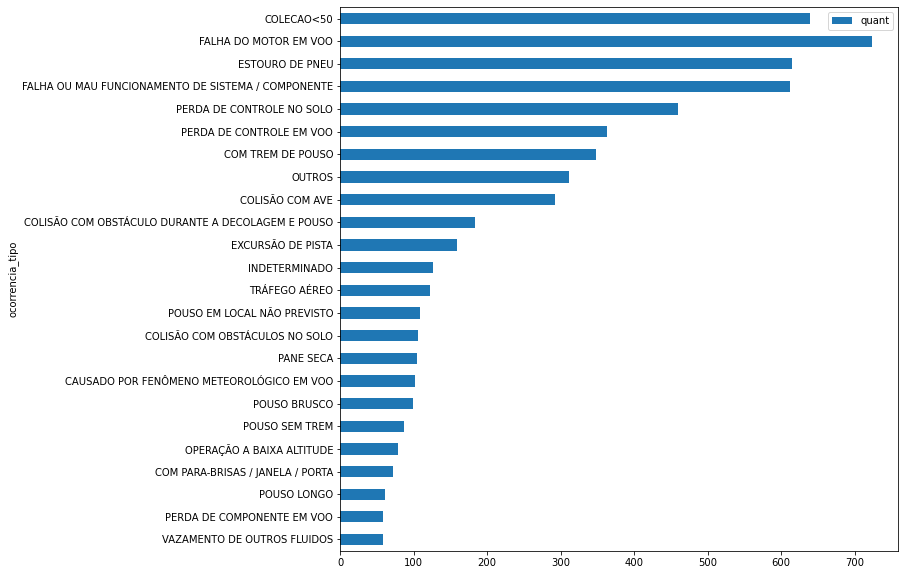

In [15]:

aux_count_cat_ocorrencia_tipo[aux_count_cat_ocorrencia_tipo['quant']>=50].plot.barh(x='ocorrencia_tipo',ylabel='aasd',figsize=(10,10),)

Os Valores presentes nas colunas 'ocorrencia_tipo_categoria' e 'taxonomia_tipo_icao' são similares aos presente na coluna 'ocorrencia_tipo'. Devido escopo do presente experimento, é possivel abstrair essas colunas.

## 1.2 AERONAVE.csv - Informações sobre as aeronaves envolvidas nas ocorrências.

### * Impressão dos Dados

In [16]:
db_aeronave

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,PTNQX,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,1202,...,BRASIL,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
1,39155,PTLVI,***,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,4377,...,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0
2,39156,PPPTO,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,22500,...,BRASIL,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0
3,39158,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,108862,...,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
4,39176,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,...,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,79802,PRGUF,***,AVIÃO,BOEING COMPANY,737-8EH,B738,JATO,BIMOTOR,70533,...,BRASIL,BRASIL,AVIÃO,REGULAR,SANTOS DUMONT,TANCREDO NEVES,SUBIDA,REGULAR,NENHUM,0
5817,79804,PRAJZ,***,***,BOEING COMPANY,737-48E,B734,JATO,BIMOTOR,65090,...,BRASIL,BRASIL,***,REGULAR,EDUARDO GOMES,VIRACOPOS,DESCIDA,REGULAR,NENHUM,0
5818,79824,PRALA,***,AVIÃO,PIPER AIRCRAFT,PA-25-235,PA25,PISTÃO,MONOMOTOR,1315,...,BRASIL,BRASIL,AVIÃO,AGRÍCOLA,RIO PARANAÍBA,RIO PARANAÍBA,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0
5819,79844,PRJBP,***,HELICÓPTERO,SIKORSKY AIRCRAFT,S-92A,S92,TURBOEIXO,BIMOTOR,12020,...,BRASIL,BRASIL,HELICÓPTERO,TÁXI AÉREO,JACAREPAGUÁ,FORA DE AERODROMO,CRUZEIRO,TÁXI AÉREO,NENHUM,0


assim como não seção 1.1, é possivel perceber que as bases AERONAVE e OCORRÊNCIA têm quantidade de linha diferentes (+69 para ser mais expecífico), isso se deve a ocorrêcias que envolve mais de uma aeronave (representado do pela coluna 'total_aeronaves_envolvidas' na Base Ocorrencia)

### 1.2.1 Descrição dos dados da base AERONAVE

In [17]:
db_aeronave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia2           5821 non-null   int64  
 1   aeronave_matricula           5821 non-null   object 
 2   aeronave_operador_categoria  5821 non-null   object 
 3   aeronave_tipo_veiculo        5821 non-null   object 
 4   aeronave_fabricante          5821 non-null   object 
 5   aeronave_modelo              5821 non-null   object 
 6   aeronave_tipo_icao           5821 non-null   object 
 7   aeronave_motor_tipo          5821 non-null   object 
 8   aeronave_motor_quantidade    5821 non-null   object 
 9   aeronave_pmd                 5821 non-null   int64  
 10  aeronave_pmd_categoria       5821 non-null   int64  
 11  aeronave_assentos            5670 non-null   float64
 12  aeronave_ano_fabricacao      5671 non-null   float64
 13  aeronave_pais_fabr

E possível observar que grande parte das variaveis não sem valores ausente, com exceção de 'aeronave_assentos', 'aeronave_ano_fabricacao'. Também é possivel saber quais valores são numériocos e categóricos (esses valores seram descrimanado mais a frente devido o tamanho da base)

### 1.2.2 Vericação se uma aeronave está envolvida em mais de uma ocorrência 

Na base de dado por hora examindada, as aeronaves são identificadas atreves da coluna 'aeronave_matricula'.

In [18]:
#Armazena o número de aeronavas que se envolveram em mais de uma ocorrência 
aero_mais_uma_ocerrencia = db_aeronave[db_aeronave['aeronave_matricula'].duplicated(keep='first')==True].shape[0]

#Armazana o total de vezes que aparece as aeronaves envolvidas mais de uma ocorrência
num_total_duplicado = db_aeronave[db_aeronave['aeronave_matricula'].duplicated(keep=False)==True].shape[0]

print(f'O número total de aeronave envolvdas em ocorrência é de {db_aeronave.shape[0]-num_total_duplicado+aero_mais_uma_ocerrencia}, sendo: \n\t*{db_aeronave.shape[0]} total de ocorrências, \n\t*{aero_mais_uma_ocerrencia} número de aeronaves envolvidas em mais de uma ocorrência, \n\t*{num_total_duplicado} total de ocorrência que aparece as aeronaves duplicadas')

O número total de aeronave envolvdas em ocorrência é de 4863, sendo: 
	*5821 total de ocorrências, 
	*1571 número de aeronaves envolvidas em mais de uma ocorrência, 
	*2529 total de ocorrência que aparece as aeronaves duplicadas


In [19]:
print(f'apriximadamente {round((aero_mais_uma_ocerrencia*100)/db_aeronave.shape[0],2)}% das aeronaves já se envolveram em mais de uma Ocorrência')

apriximadamente 26.99% das aeronaves já se envolveram em mais de uma Ocorrência


É possivel notar que o 26.99% é um número bastante significativo, porém por questão de prazo, a variavel 'aeronave_matricula' será abstraida.

### 1.2.3 Analise da Colunas 'aeronave_operador_categoria', 'aeronave_registro_segmento', 'aeronave_tipo_operacao'

Por ser uma base extença, abstações e inferencia são importantes para diminuir o esforço compútacional. Outro ponto é o prazo para a devolutiva desse Teste Técnico. Abaixo esta uma print de cada contagem de cada classe presente nas variaveis 'aeronave_operador_categoria', 'aeronave_registro_segmento', 'aeronave_tipo_operacao'.

In [20]:
#inicialização do dicionario para a contagem dos aeronave_operador_categoria
aux_count_cat_aeronave_operador_categoria = dict([[x, 0] for x in db_aeronave['aeronave_operador_categoria'].unique()])

#Laço para contar quantas vezes aparece um determinado valor
for i in  db_aeronave['aeronave_operador_categoria']:
    aux_count_cat_aeronave_operador_categoria[i] = aux_count_cat_aeronave_operador_categoria[i]+1


valores_indeterminados = ['***']
aux_count_cat_aeronave_operador_categoria['indeterminado'] = 0

#subistituição e remoção das variaveis com valores_indeterminados
for j in valores_indeterminados:
    aux_count_cat_aeronave_operador_categoria['indeterminado'] += aux_count_cat_aeronave_operador_categoria[j]
    aux_count_cat_aeronave_operador_categoria.pop(j,None)

#converção para dataseries ordenando o dict de acordo com os valores
aux_count_cat_aeronave_operador_categoria = pd.DataFrame(list(sorted(aux_count_cat_aeronave_operador_categoria.items(), key=lambda x: x[1], reverse=False)), columns=['aeronave_operador_categoria', 'quant'])

aux_count_cat_aeronave_operador_categoria

,aeronave_operador_categoria,quant
0,ADMINISTRAÇÃO INDIRETA,1
1,MÚLTIPLA,9
2,NÃO REGULAR,17
3,AGRÍCOLA,23
4,ESPECIALIZADA,40
5,ADMINISTRAÇÃO DIRETA,104
6,EXPERIMENTAL,347
7,INSTRUÇÃO,387
8,TÁXI AÉREO,487
9,PARTICULAR,724


In [21]:
#inicialização do dicionario para a contagem dos aeronave_registro_segmento
aux_count_cat_aeronave_registro_segmento = dict([[x, 0] for x in db_aeronave['aeronave_registro_segmento'].unique()])

#Laço para contar quantas vezes aparece um determinado valor
for i in  db_aeronave['aeronave_registro_segmento']:
    aux_count_cat_aeronave_registro_segmento[i] = aux_count_cat_aeronave_registro_segmento[i]+1

valores_indeterminados = ['***']
aux_count_cat_aeronave_registro_segmento['indeterminado'] = 0

#subistituição e remoção das variaveis com valores_indeterminados
for j in valores_indeterminados:
    aux_count_cat_aeronave_registro_segmento['indeterminado'] += aux_count_cat_aeronave_registro_segmento[j]
    aux_count_cat_aeronave_registro_segmento.pop(j,None)

#converção para dataseries ordenando o dict de acordo com os valores
aux_count_cat_aeronave_registro_segmento = pd.DataFrame(list(sorted(aux_count_cat_aeronave_registro_segmento.items(), key=lambda x: x[1], reverse=False)), columns=['aeronave_registro_segmento', 'quant'])

aux_count_cat_aeronave_registro_segmento

,aeronave_registro_segmento,quant
0,HISTÓRICA,2
1,ADMINISTRAÇÃO INDIRETA,8
2,NÃO REGULAR,28
3,MÚLTIPLA,32
4,indeterminado,89
5,ESPECIALIZADA,122
6,ADMINISTRAÇÃO DIRETA,193
7,AGRÍCOLA,345
8,EXPERIMENTAL,460
9,TÁXI AÉREO,770


In [22]:
#inicialização do dicionario para a contagem dos aeronave_tipo_operacao
aux_count_cat_aeronave_tipo_operacao = dict([[x, 0] for x in db_aeronave['aeronave_tipo_operacao'].unique()])

#Laço para contar quantas vezes aparece um determinado valor
for i in  db_aeronave['aeronave_tipo_operacao']:
    aux_count_cat_aeronave_tipo_operacao[i] = aux_count_cat_aeronave_tipo_operacao[i]+1

valores_indeterminados = ['***']
aux_count_cat_aeronave_tipo_operacao['indeterminado'] = 0

#subistituição e remoção das variaveis com valores_indeterminados
for j in valores_indeterminados:
    aux_count_cat_aeronave_tipo_operacao['indeterminado'] += aux_count_cat_aeronave_tipo_operacao[j]
    aux_count_cat_aeronave_tipo_operacao.pop(j,None)

#converção para dataseries ordenando o dict de acordo com os valores
aux_count_cat_aeronave_tipo_operacao = pd.DataFrame(list(sorted(aux_count_cat_aeronave_tipo_operacao.items(), key=lambda x: x[1], reverse=False)), columns=['aeronave_tipo_operacao', 'quant'])

aux_count_cat_aeronave_tipo_operacao

,aeronave_tipo_operacao,quant
0,NÃO REGULAR,59
1,ESPECIALIZADA,79
2,indeterminado,155
3,POLICIAL,156
4,EXPERIMENTAL,291
5,AGRÍCOLA,478
6,TÁXI AÉREO,754
7,INSTRUÇÃO,784
8,REGULAR,1177
9,PRIVADA,1888


#### Abstração
Dado o que foi apresenta nas tabelas assim será selecionado a coluna 'aeronave_registro_segmento' para representar esse conjunto de caracteristica.

### 1.2.4 Validação da igualdade entre as variaveis 'aeronave_tipo_veiculo' e 'aeronave_registro_categoria'

In [23]:
db_aeronave[db_aeronave['aeronave_tipo_veiculo']!=db_aeronave['aeronave_registro_categoria']]

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total


Como visto acima as variaveis 'aeronave_tipo_veiculo' e 'aeronave_registro_categoria' têm o mesmo valor, por isso apenas 'aeronave_tipo_veiculo' será levada em consideração 

## 1.3 FATOR_CONTRIBUINTE.csv - Informações sobre os fatores contribuinte das ocorrências que tiveram investigações finalizadas.

### *Impressão dos Dados da base

In [24]:
db_fator_contribuinte

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,39115,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,39115,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
2,39115,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
3,39115,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,39115,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
...,...,...,...,...,...
4156,79397,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4157,79397,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
4158,79397,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4159,79665,MANUTENÇÃO DA AERONAVE,DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL


Assim como os anteriores, como cada ocorrêmcia pode ter mais de um fator contribuinte, isso justivica a presença de de id's repedidos

In [25]:
db_fator_contribuinte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4161 entries, 0 to 4160
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codigo_ocorrencia3   4161 non-null   int64 
 1   fator_nome           4161 non-null   object
 2   fator_aspecto        4161 non-null   object
 3   fator_condicionante  4161 non-null   object
 4   fator_area           4161 non-null   object
dtypes: int64(1), object(4)
memory usage: 162.7+ KB


In [26]:
#inicialização do dicionario para a contagem dos fator_area
aux_count_cat_db_fator_contribuinte = dict([[x, 0] for x in db_fator_contribuinte['fator_area'].unique()])

#Laço para contar quantas vezes aparece um determinado valor
for i in  db_fator_contribuinte['fator_area']:
    aux_count_cat_db_fator_contribuinte[i] = aux_count_cat_db_fator_contribuinte[i]+1

valores_indeterminados = ['***']
aux_count_cat_db_fator_contribuinte['indeterminado'] = 0

#subistituição e remoção das variaveis com valores_indeterminados
for j in valores_indeterminados:
    aux_count_cat_db_fator_contribuinte['indeterminado'] += aux_count_cat_db_fator_contribuinte[j]
    aux_count_cat_db_fator_contribuinte.pop(j,None)

#converção para dataseries ordenando o dict de acordo com os valores
aux_count_cat_db_fator_contribuinte = pd.DataFrame(list(sorted(aux_count_cat_db_fator_contribuinte.items(), key=lambda x: x[1], reverse=False)), columns=['fator_area', 'quant'])

aux_count_cat_db_fator_contribuinte

,fator_area,quant
0,FATOR MATERIAL,26
1,indeterminado,28
2,OUTRO,62
3,FATOR HUMANO,1325
4,FATOR OPERACIONAL,2720


A base não têm variaveis ausentes, porém por questão de prazo, não será possivel realizer uma analise mais profunda nos dados. 

# 2 Seleção dos Dados para realização da levantamento de Hipóteses (visando a absenção de respostas) e descrição detalhada para a Análise Exploratória

Esse documento teve como itúito a analizar os dados das base de dados OCORRÊNCIA, OCORRÊNCIA_TIPO, AERONAVE e FATOR_CONTRIBUINTE forma 'crua' pra a abtemção do conhecimento do dominio (posto que não é possivel colher essas informaçes com algum com dominio sobre o assunto) e salecionar as melhores variaveis para analise Exploratória baseado em premissas e suposições. Como dito anteiormente, esse Teste Técnico foi encarado como uma nova proposta de cliente e eu já fizersse parte da equipe. 

O presente notebook foi pensado para ser apresentado ao corpo técnico da empresa, pois têm informações especificas que para um cliente leigo peria causar confução. Já o notebook 'Ocorrencias_Aeronauticas_Aviacao_Civil_Brasileira - Teste Tecnico Cientista de Dados - A3Data' foi desenvolvido pensando em uma apresentação direta ao suposto cliente. Dito isso esse seria o primeiro ciclo de desenvolvimento com uma prazo determinado (o que de fato tinha). 

Os resuldatos obtidos nesse notebook estão na pasta 'base_dados'

## 2.0 Indicando qual dados faram parte das novas bases de dados

A seguir estaram descriminado quais valiaveis está faram parte das novas bases de dados. Os que não está descrimanados acima será ignorados devido o objetio é ententer as ocorrencias e analisar os casos com fatalidade dos demais, caracteristicas julcados como não contibuite e/ou com valores ausente(null/missing), ou por questão de prazo. 

### 2.0.1 OCORRÊNCIA

* codigo_ocorrencia = Representará todos os id's;
* ocorrencia_classificacao;
* ocorrencia_uf;
* ocorrencia_dia = será tranformado em 'ocorrencia_mes' e 'ocorrencia_ano';
* ocorrencia_hora = será tranformado em horas completas;
* total_aeronaves_envolvidas;


### 2.0.2 OCORRÊNCIA_TIPO

* codigo_ocorrencia1 = será covertida para 'codigo_ocorrencia';
* ocorrencia_tipo;

### 2.0.3 AERONAVE

* codigo_ocorrencia2 = será covertida para 'codigo_ocorrencia';
* aeronave_registro_segmento;
* aeronave_tipo_veiculo;
* aeronave_fabricante;
* aeronave_modelo;
* aeronave_motor_tipo;
* aeronave_motor_quantidade;
* aeronave_assentos;
* aeronave_ano_fabricacao;
* aeronave_nivel_dano;
* aeronave_fase_operacao;
* aeronave_fatalidades_total;

### 2.0.4 FATOR_CONTRIBUINTE

* codigo_ocorrencia3 = será covertida para 'codigo_ocorrencia';
* fator_area;


### 2.0.5 RECOMENDAÇÃO

Em uma analise em prazo e beneficio para essa base, foi priorizado o prazo.

## 2.1 Geração da base de dados

Salvando base de dados OCORRENCIA

In [27]:
aux_mes = [x.split('/')[1] for x in db_ocorrencia['ocorrencia_dia'].to_numpy()]
aux_ano = [x.split('/')[2] for x in db_ocorrencia['ocorrencia_dia'].to_numpy()]
auxhoras = [str(x).split(':')[0] for x in db_ocorrencia['ocorrencia_hora'].to_numpy()]
resp_db_ocorrencia = db_ocorrencia[['codigo_ocorrencia', 'ocorrencia_classificacao','ocorrencia_uf','total_aeronaves_envolvidas']]
resp_db_ocorrencia['ocorrencia_hora'] = auxhoras
resp_db_ocorrencia['ocorrencia_mes'] = aux_mes
resp_db_ocorrencia['ocorrencia_ano'] = aux_ano

resp_db_ocorrencia.to_csv('base_dados/trabalhada_ocorrencia_2010_2020.csv', index=False)

resp_db_ocorrencia

<ipython-input-27-e0bb5aaef4f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resp_db_ocorrencia['ocorrencia_hora'] = auxhoras
<ipython-input-27-e0bb5aaef4f4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resp_db_ocorrencia['ocorrencia_mes'] = aux_mes
<ipython-input-27-e0bb5aaef4f4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_uf,total_aeronaves_envolvidas,ocorrencia_hora,ocorrencia_mes,ocorrencia_ano
0,40211,INCIDENTE,RJ,1,12,01,2010
1,40349,INCIDENTE,PA,1,11,01,2010
2,40351,INCIDENTE,RJ,1,03,01,2010
3,39527,ACIDENTE,MT,1,17,01,2010
4,40324,INCIDENTE,RS,1,19,01,2010
...,...,...,...,...,...,...,...
5747,79804,INCIDENTE,SP,1,19,12,2020
5748,79757,INCIDENTE GRAVE,TO,1,18,12,2020
5749,79802,INCIDENTE,RJ,1,00,12,2020
5750,79756,INCIDENTE GRAVE,MS,1,09,12,2020


Salvando base de dados OCORRENCIA_TIPO

In [28]:
resp_db_ocorrencia_tipo = pd.DataFrame({'codigo_ocorrencia': db_ocorrencia_tipo['codigo_ocorrencia1'].to_numpy()})
resp_db_ocorrencia_tipo['ocorrencia_tipo'] = db_ocorrencia_tipo['ocorrencia_tipo']
resp_db_ocorrencia_tipo.to_csv('base_dados/trabalhada_ocorrencia_tipo_2010_2020.csv', index=False)

resp_db_ocorrencia_tipo


,codigo_ocorrencia,ocorrencia_tipo
0,39115,PANE SECA
1,39155,VAZAMENTO DE COMBUSTÍVEL
2,39156,FOGO EM VOO
3,39158,SUPERAQUECIMENTO
4,39176,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
...,...,...
5879,79802,VAZAMENTO DE OUTROS FLUIDOS
5880,79804,DESCOMPRESSÃO NÃO INTENCIONAL / EXPLOSIVA
5881,79824,PERDA DE CONTROLE EM VOO
5882,79844,FALHA DO MOTOR EM VOO


Salvando base de dados AERONAVE

In [29]:
resp_db_aeronave = pd.DataFrame({'codigo_ocorrencia': db_aeronave['codigo_ocorrencia2'].to_numpy()})
resp_db_aeronave['aeronave_registro_segmento'] = db_aeronave['aeronave_registro_segmento']
resp_db_aeronave['aeronave_tipo_veiculo'] = db_aeronave['aeronave_tipo_veiculo']
resp_db_aeronave['aeronave_fabricante'] = db_aeronave['aeronave_fabricante']
resp_db_aeronave['aeronave_modelo'] = db_aeronave['aeronave_modelo']
resp_db_aeronave['aeronave_motor_tipo'] = db_aeronave['aeronave_motor_tipo']
resp_db_aeronave['aeronave_motor_quantidade'] = db_aeronave['aeronave_motor_quantidade']
resp_db_aeronave['aeronave_assentos'] = db_aeronave['aeronave_assentos']
resp_db_aeronave['aeronave_ano_fabricacao'] = db_aeronave['aeronave_ano_fabricacao']
resp_db_aeronave['aeronave_nivel_dano'] = db_aeronave['aeronave_nivel_dano']
resp_db_aeronave['aeronave_fase_operacao'] = db_aeronave['aeronave_fase_operacao']
resp_db_aeronave['aeronave_fatalidades_total'] = db_aeronave['aeronave_fatalidades_total']

resp_db_aeronave.to_csv('base_dados/trabalhada_aeronave_tipo_2010_2020.csv', index=False)
resp_db_aeronave

,codigo_ocorrencia,aeronave_registro_segmento,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_nivel_dano,aeronave_fase_operacao,aeronave_fatalidades_total
0,39115,PARTICULAR,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,PISTÃO,MONOMOTOR,4.0,1979.0,SUBSTANCIAL,DECOLAGEM,0
1,39155,PARTICULAR,AVIÃO,BEECH AIRCRAFT,C90,TURBOÉLICE,BIMOTOR,8.0,1979.0,NENHUM,DECOLAGEM,0
2,39156,REGULAR,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,TURBOÉLICE,BIMOTOR,73.0,2008.0,LEVE,ARREMETIDA NO AR,0
3,39158,REGULAR,AVIÃO,BOEING COMPANY,757-225,JATO,BIMOTOR,5.0,1984.0,NENHUM,SUBIDA,0
4,39176,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,JATO,BIMOTOR,184.0,2001.0,NENHUM,SUBIDA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5816,79802,REGULAR,AVIÃO,BOEING COMPANY,737-8EH,JATO,BIMOTOR,193.0,2010.0,NENHUM,SUBIDA,0
5817,79804,REGULAR,***,BOEING COMPANY,737-48E,JATO,BIMOTOR,NaN,NaN,NENHUM,DESCIDA,0
5818,79824,AGRÍCOLA,AVIÃO,PIPER AIRCRAFT,PA-25-235,PISTÃO,MONOMOTOR,1.0,0.0,SUBSTANCIAL,MANOBRA,0
5819,79844,TÁXI AÉREO,HELICÓPTERO,SIKORSKY AIRCRAFT,S-92A,TURBOEIXO,BIMOTOR,NaN,NaN,NENHUM,CRUZEIRO,0


Salvando base de dados FATOR_CONTRIBUINTE

In [30]:
resp_db_fator_contribuinte = pd.DataFrame({'codigo_ocorrencia': db_fator_contribuinte['codigo_ocorrencia3'].to_numpy()})
resp_db_fator_contribuinte['fator_area'] = db_fator_contribuinte['fator_area']
resp_db_fator_contribuinte.to_csv('base_dados/trabalhada_fator_contribuinte_2010_2020.csv', index=False)
resp_db_fator_contribuinte

,codigo_ocorrencia,fator_area
0,39115,FATOR OPERACIONAL
1,39115,FATOR OPERACIONAL
2,39115,FATOR HUMANO
3,39115,FATOR OPERACIONAL
4,39115,FATOR OPERACIONAL
...,...,...
4156,79397,FATOR OPERACIONAL
4157,79397,FATOR HUMANO
4158,79397,FATOR OPERACIONAL
4159,79665,FATOR OPERACIONAL
